## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
all_data["Mouse ID"].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = all_data[all_data.duplicated(keep="first")]
duplicates["Mouse ID"].count()


1

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = all_data.drop([0,909])

In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].count()

1891

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

volume_summary_df = cleaned_data[["Drug Regimen","Tumor Volume (mm3)"]]


regimen_df = volume_summary_df.groupby(["Drug Regimen"])

mean_volume = regimen_df["Tumor Volume (mm3)"].mean()
median_volume = regimen_df["Tumor Volume (mm3)"].median()
var_volume = regimen_df["Tumor Volume (mm3)"].var()
sd_volume = regimen_df["Tumor Volume (mm3)"].std()
SEM = regimen_df["Tumor Volume (mm3)"].sem()

volume_summary_table = pd.DataFrame({
    "Mean":mean_volume,
    "Median":median_volume,
    "Variance":var_volume,
    "Standard Deviation":sd_volume,
    "SEM":SEM
})

volume_summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.195673,40.668343,23.488945,4.846539,0.321676
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = volume_summary_df.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.195673  40.668343  23.488945  4.846539  0.321676
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

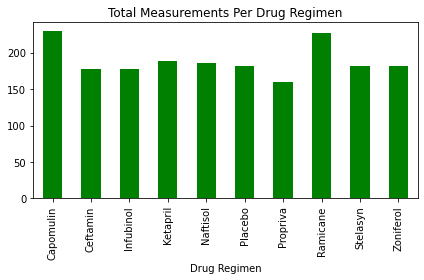

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
entries2 = regimen_df["Tumor Volume (mm3)"].count()
count_chart = entries2.plot(kind="bar", title="Total Measurements Per Drug Regimen", color="green")

plt.tight_layout()

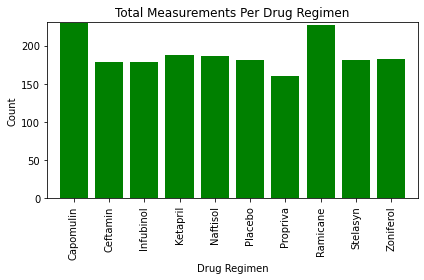

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

entries = regimen_df["Tumor Volume (mm3)"].count()
entries

drug = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
counts=[230,178,178,188,186,181,160,227,181,182]
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width=0.8, color="g", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(counts)+0.4)

plt.title("Total Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()

<AxesSubplot:title={'center':'Distribution of Mice (By Gender)'}, ylabel='Sex'>

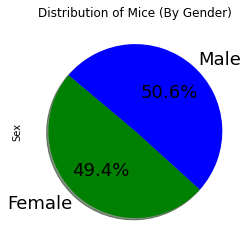

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_data.groupby("Sex")
gender_count = pd.DataFrame(gender_df["Sex"].count())
gender_count.head()

gender_count.plot(kind="pie", y="Sex", title="Distribution of Mice (By Gender)", startangle=140, shadow=True, autopct="%1.1f%%", colors=["green","blue"], fontsize=18, legend=False)



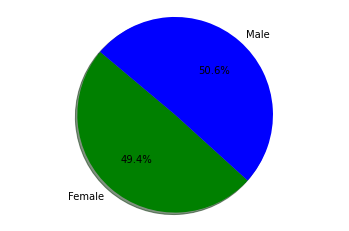

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#find gender counts
gc = cleaned_data.groupby("Sex")
gc = pd.DataFrame(gc["Sex"].count())
gc.head()

#plot
gender = ["Female","Male"]
gcount = [934,957]
colors = ["green","blue"]
explode = (0,0)
plt.pie(gcount, explode=explode, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:
#Capomulin, Ramicane, Infubinol, Ceftamin
treatments_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
final_tv = []

counter = 0
#Find the last timepoint, then the final tumor volume for each mouse
for x in treatments_list:
    df1 = cleaned_data.loc[(cleaned_data["Drug Regimen"]==x),["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
    df2 = df1.loc[(cleaned_data["Timepoint"]==45),["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
    df2 = df2.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
    final_tv.append(df2["Final Tumor Volume (mm3)"])
    if counter==0:
        print(df2)
counter += 1

    Mouse ID Drug Regimen  Final Tumor Volume (mm3)
19      s185    Capomulin                 23.343598
29      x401    Capomulin                 28.484033
39      m601    Capomulin                 28.430964
104     u364    Capomulin                 31.023923
124     y793    Capomulin                 31.896238
134     r554    Capomulin                 32.377357
144     m957    Capomulin                 33.329098
164     t565    Capomulin                 34.455298
204     i738    Capomulin                 37.311846
224     w914    Capomulin                 36.041047
244     g288    Capomulin                 37.074024
282     l897    Capomulin                 38.846876
299     b742    Capomulin                 38.939633
309     b128    Capomulin                 38.982878
337     j119    Capomulin                 38.125164
350     v923    Capomulin                 40.658124
360     g316    Capomulin                 40.159220
370     s710    Capomulin                 40.728578
380     l509

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
counter = 0

for x in treatments_list:
    df = cleaned_data.loc[cleaned_data["Drug Regimen"]== x,"Tumor Volume (mm3)"]
    quartiles = df.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    if counter ==0:
        print(f"---------------------------------------")
        print(f"{x} IQR data is:")
        print(f"The lower quartile of {x} is: {lowerq}")
        print(f"The upper quartile of {x} is: {upperq}")
        print(f"The interquartile range of {x} is: {iqr}")
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")
counter += 1

---------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
---------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 36.636973819999994
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.363026180000006
Values below 24.092434549999986 could be outliers.
Values above 57.54453927000001 could be outliers.
---------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
---------------------------------------
Ceftamin I

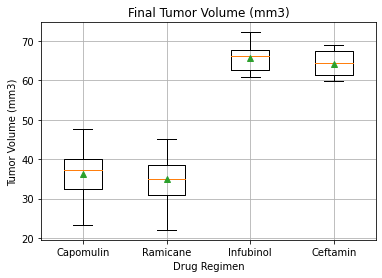

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume (mm3)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(final_tv, showmeans=True)
ax1.set_xticklabels(treatments_list)
plt.grid()
plt.show()


## Line and Scatter Plots

(0.0, 45.0)

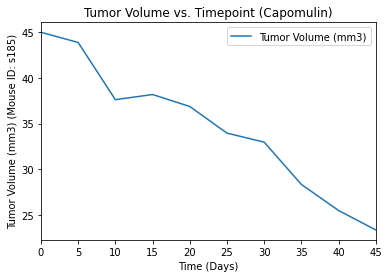

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#retreive only mice treated with Capomulin
capomulin = cleaned_data.loc[(cleaned_data["Drug Regimen"]=="Capomulin")]
capomulin
#retreive data for one mouse treated with Capomulin
capomulin2 = capomulin.loc[(capomulin["Mouse ID"]=="s185")]
#generate line plot
capomulin2.plot.line(x="Timepoint",y="Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint (Capomulin)")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3) (Mouse ID: s185)")
plt.xlim(0,45)

In [272]:
#find averages for Capomulin regimen
avgs = capomulin.groupby(["Mouse ID"]).agg('mean')

Text(0, 0.5, 'Tumor Volume (mm3)')

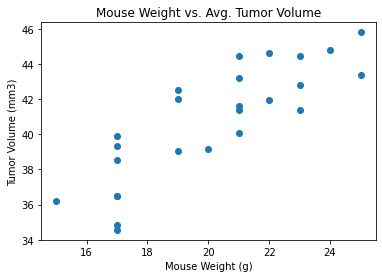

In [273]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x=avgs["Weight (g)"]
y=avgs["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The regression line equation is: y = 0.95x +21.55
The correlation coefficient (r) is: 0.8419363424694718
The r-squared is: 0.7088568047708717


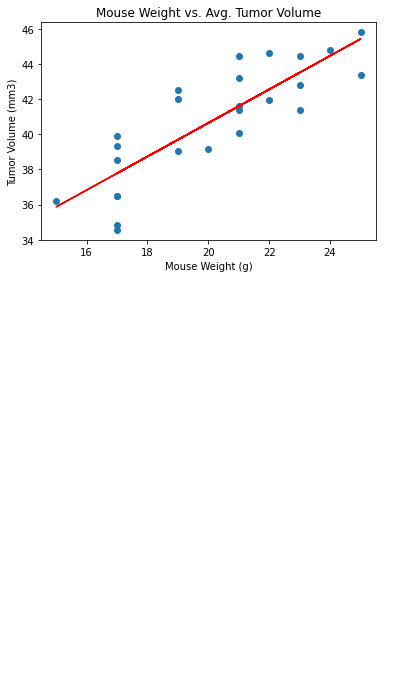

In [274]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x=avgs["Weight (g)"]
y=avgs["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color="red")
plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The regression line equation is: {line_eq}")
print(f"The correlation coefficient (r) is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()